# Hodgkin-Huxley model specifications
This lays out the parameterizations for the HH point cells for the event-based encodings manuscript.

In [1]:
import sys
import numpy as np
import random
import pandas as pd
from neuron import h
h.load_file("stdrun.hoc")

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
sys.path.insert(1, "./utils/")
import HH, Stimuli

In [1]:
100000*40

4000000

## generate stimuli

In [45]:
sim_duration = 100000

stim_types = ['base','lw','lt','lwlt','burst']

e_times = Stimuli.poisson_process_duration(5, sim_duration)
i_times = Stimuli.poisson_process_duration(15, sim_duration)

In [46]:
figures_dir = './figures/'

## Set up point cell models

In [47]:
stim_scaffold = {
    'base': {
        'ex': Stimuli.PoissonStim(
            'ex_base', 'ex_base',
            interval=5,
            rev_potential=0,
            weight=0.0002,
            tau=2,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_base', 'in_base',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=6,
            seed='na'
        )
    },
    'lw': {
        'ex': Stimuli.PoissonStim(
            'ex_lw', 'ex_lw',
            interval=5,
            rev_potential=0,
            weight=0.00015,
            tau=2,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lw', 'in_lw',
            interval=15,
            rev_potential=-80,
            weight=0.0002,
            tau=6,
            seed='na'
        )
    },
    'lt': {
        'ex': Stimuli.PoissonStim(
            'ex_lt', 'ex_lt',
            interval=5,
            rev_potential=0,
            weight=0.0002,
            tau=10,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lt', 'in_lt',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=40,
            seed='na'
        )
    },
    'lwlt': {
        'ex': Stimuli.PoissonStim(
            'ex_lwlt', 'ex_lwlt',
            interval=5,
            rev_potential=0,
            weight=0.00015,
            tau=10,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_lwlt', 'in_lwlt',
            interval=15,
            rev_potential=-80,
            weight=0.0002,
            tau=40,
            seed='na'
        )
    },
    'burst': {
        'ex': Stimuli.PoissonStim(
            'ex_burst', 'ex_burst',
            interval=5,
            rev_potential=0,
            weight=0.0001,
            tau=40,
            seed='na'
        ),
        'in': Stimuli.PoissonStim(
            'in_burst', 'in_burst',
            interval=15,
            rev_potential=-80,
            weight=0.0005,
            tau=20,
            seed='na'
        )
    }
}

for stim_type in stim_scaffold:
    stim_scaffold[stim_type]['ex'].stim_times = e_times
    stim_scaffold[stim_type]['in'].stim_times = i_times

In [48]:
sims = {stim_type:HH.HH() for stim_type in stim_types}

for stim_type in stim_types:
    sims[stim_type].add_custom_stimulus(stim_scaffold[stim_type]['ex'])
    sims[stim_type].add_custom_stimulus(stim_scaffold[stim_type]['in'])
    sims[stim_type].run_simulation(sim_duration)

In [49]:
colors = {
    'base':'maroon',
    'lw':'orangered',
    'lt':'darkgreen',
    'lwlt':'teal',
    'burst':'indigo'
}

## General Statistics

In [50]:
for stim_type in stim_types:
    
    spikes = list(sims[stim_type].spike_times)
    isis = [spikes[i+1] - spikes[i] for i in range(len(spikes)-1)]

    print(stim_type)
    print(f'\taverage spike frequency: {len(spikes) / (sim_duration / 1000)} Hz')
    print(f'\tcoefficient of variation (CV) of ISIs: {np.std(isis) / np.mean(isis)}')
    print()

base
	average spike frequency: 22.14 Hz
	coefficient of variation (CV) of ISIs: 0.6653095727656216

lw
	average spike frequency: 13.94 Hz
	coefficient of variation (CV) of ISIs: 0.8043522574736247

lt
	average spike frequency: 17.62 Hz
	coefficient of variation (CV) of ISIs: 0.8164333983121381

lwlt
	average spike frequency: 23.1 Hz
	coefficient of variation (CV) of ISIs: 0.6990672301880715

burst
	average spike frequency: 30.07 Hz
	coefficient of variation (CV) of ISIs: 0.8400865547768007



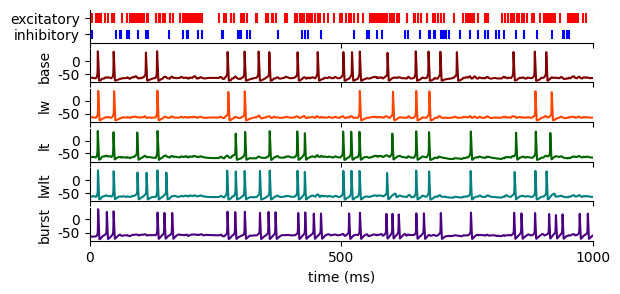

In [52]:
fig, axes = plt.subplots(6,1, figsize=(6.5,3), sharex=True)

axes[0].vlines(e_times, .2, .8, color='red')
axes[0].vlines(i_times, -.8, -.2, color='blue')
axes[0].set_ylim(-1,1)
axes[0].set_yticks([.5,-.5])
axes[0].set_yticklabels(['excitatory','inhibitory'])
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

for ax, stim_type in enumerate(stim_types):
    axes[ax+1].plot(sims[stim_type]._t, sims[stim_type]._v, c=colors[stim_type])
    axes[ax+1].set_ylabel(stim_type)
    
    axes[ax+1].spines['right'].set_visible(False)
    axes[ax+1].spines['top'].set_visible(False)
    
    axes[ax+1].set_yticks([-50,0])
    axes[ax+1].set_yticklabels([-50, 0])

xlim = 1000
axes[-1].set_xlim(0, xlim)
axes[-1].set_xlabel('time (ms)')

xticks = np.arange(0,xlim+1, 500)
axes[-1].set_xticks(xticks)
axes[-1].set_xticklabels(xticks)

plt.savefig(f'{figures_dir}point_cell_traces.svg', format='svg')
#plt.savefig(f'{figures_dir}point_cell_traces.png', format='png')

plt.show()

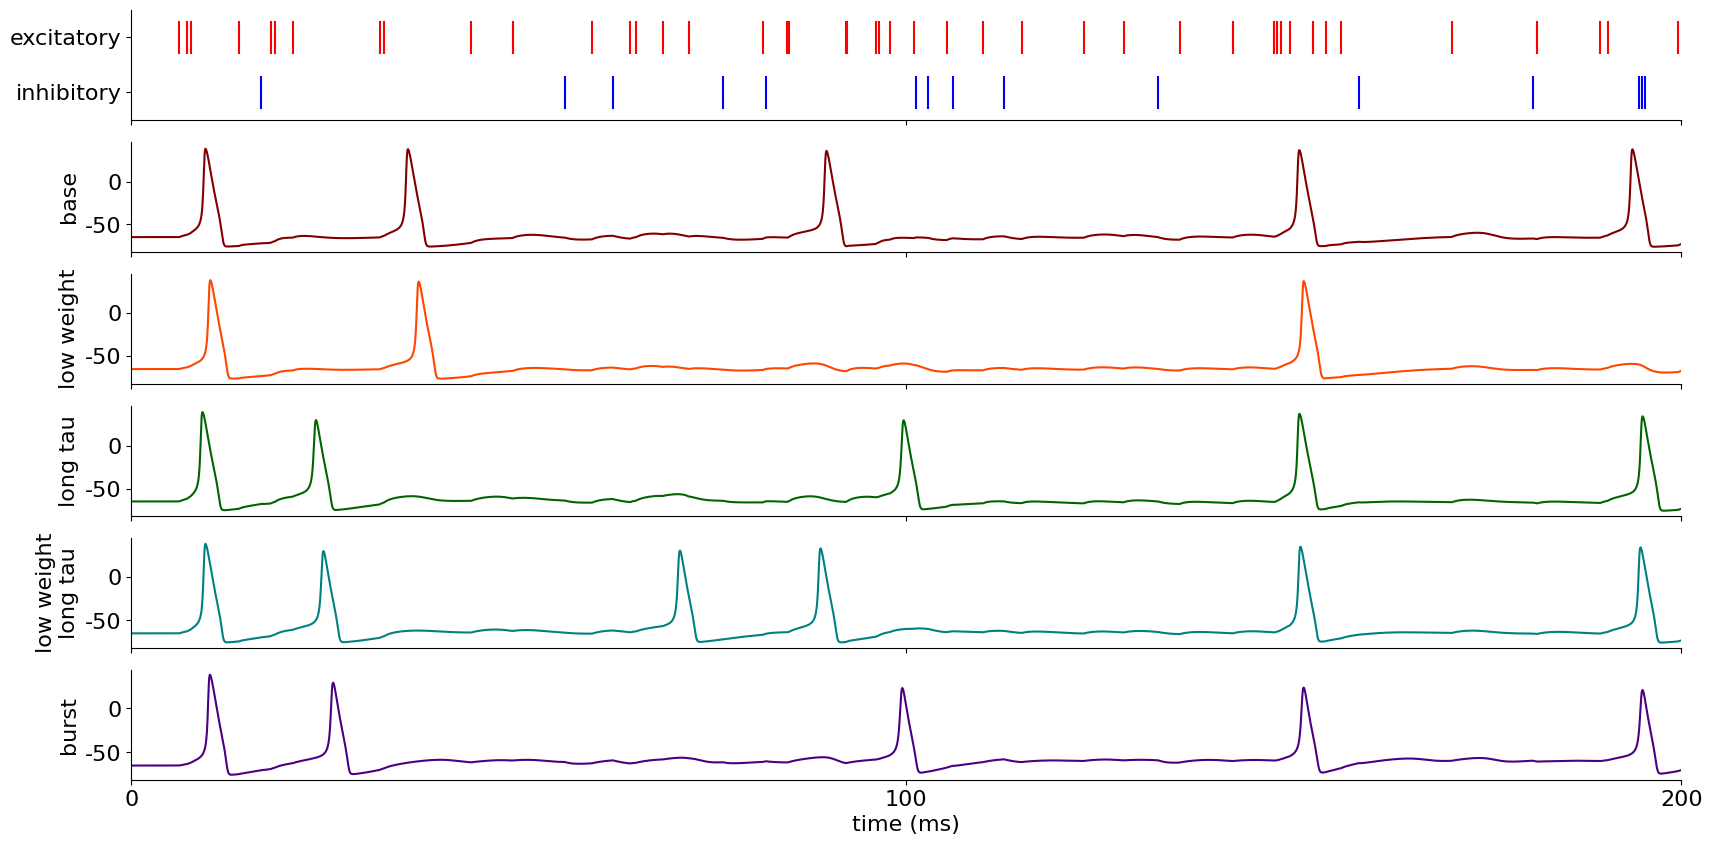

In [8]:
fig, axes = plt.subplots(6,1, figsize=(20,10), sharex=True)

axes[0].vlines(e_times, .2, .8, color='red')
axes[0].vlines(i_times, -.8, -.2, color='blue')
axes[0].set_ylim(-1,1)
axes[0].set_yticks([.5,-.5])
axes[0].set_yticklabels(['excitatory','inhibitory'], fontsize=16)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

for ax, sim in enumerate(sims):
    axes[ax+1].plot(sim._t, sim._v, c=colors[ax])
    axes[ax+1].set_ylabel(sim_names[ax], fontsize = 16)
    
    axes[ax+1].spines['right'].set_visible(False)
    axes[ax+1].spines['top'].set_visible(False)
    
    axes[ax+1].set_yticks([-50,0])
    axes[ax+1].set_yticklabels([-50, 0], fontsize = 16)

xlim = 200
axes[-1].set_xlim(0, xlim)
axes[-1].set_xlabel('time (ms)', fontsize=16)

axes[-1].set_xticks(np.arange(0,xlim+1, 100))
axes[-1].set_xticklabels(np.arange(0,xlim+1, 100), fontsize=16)

plt.show()

## ISIs

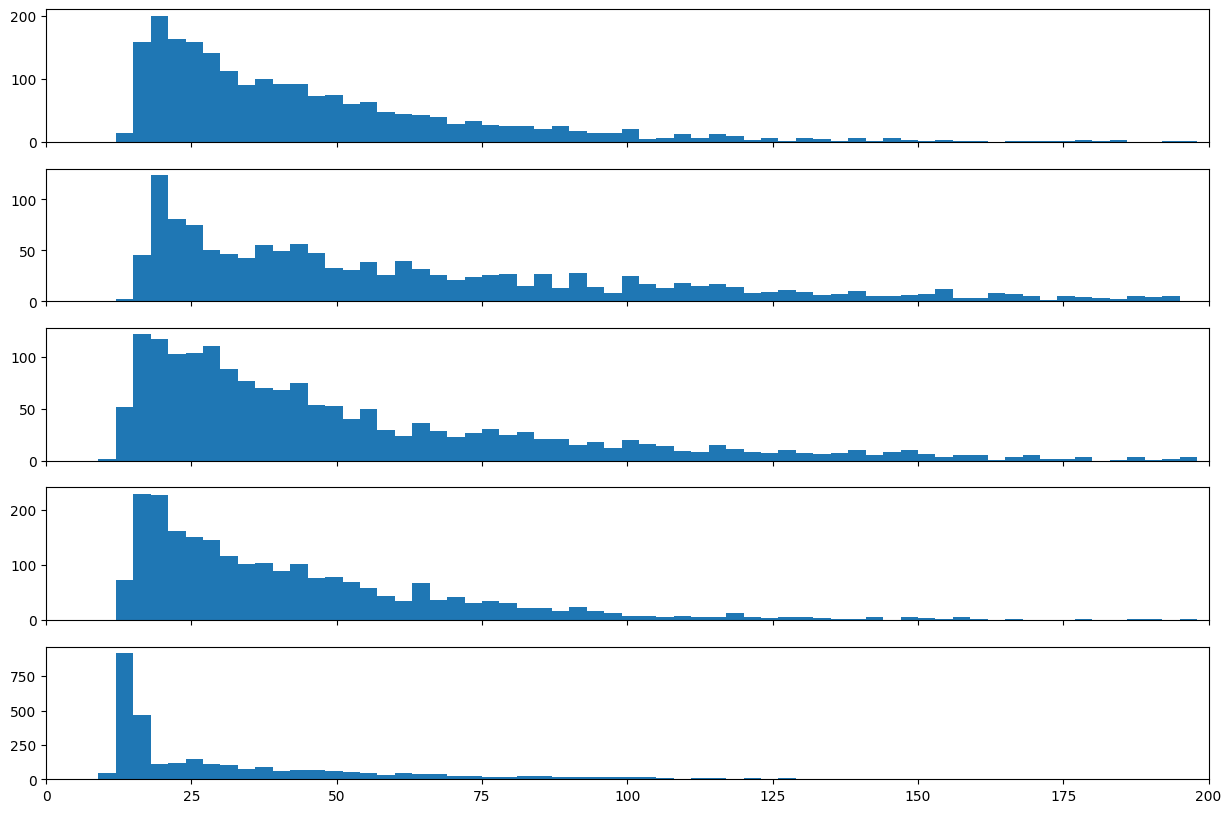

In [9]:
fig, axes = plt.subplots(5,1, sharex=True, figsize=(15,10))
ax_ind = 0

bins = np.arange(0,200,3)

all_isis = []
for sim, sim_name in zip(sims, sim_names):
    spikes = sim.spike_times
    isis = [spikes[i+1] - spikes[i] for i in range(len(spikes) - 1)]
    all_isis.append(isis)
    axes[ax_ind].hist(isis, bins=bins)
    
    ax_ind += 1
    
axes[0].set_xlim(0,200)
plt.show()

In [10]:
min(all_isis[0])

13.125000000763976

## median histories

In [53]:
def standarize_column(column):
    # set column to fit in (0,1)
    column = column-np.min(column)
    column = column/np.max(column)
    return column

def dist(p1, p2):
    # get distance between 2 standardized histories
    return np.sqrt(pow(p1['v']-p2['v'], 2) + pow(p1['m']-p2['m'], 2) + pow(p1['n']-p2['n'], 2) + pow(p1['h']-p2['h'], 2))

def get_median_history(sim):
    _v = standarize_column(np.array(sim._v))
    _m = standarize_column(np.array(sim._m))
    _n = standarize_column(np.array(sim._n))
    _h = standarize_column(np.array(sim._h))

    # calculate the median of each state variable
    median_values = {
        'v': np.median(_v),
        'm': np.median(_m),
        'n': np.median(_n),
        'h': np.median(_h)
    }
    
    dists = []
    for i in range(len(_v)):
        dists.append(dist({'v':_v[i],'m':_m[i],'n':_n[i],'h':_h[i]}, median_values))

    return {
            'v': sim._v[np.argmin(dists)],
            'm': sim._m[np.argmin(dists)],
            'n': sim._n[np.argmin(dists)],
            'h': sim._h[np.argmin(dists)]
    }

def isolate_spiking_histories(sim):
    spiking_histories = []
    for spike in sim.spike_times:
        row = round(40 * spike)
        spiking_histories.append(
            pd.DataFrame(
                {
                    'v':[sim._v[row]], 
                    'm':[sim._m[row]], 
                    'n':[sim._n[row]], 
                    'h':[sim._h[row]]
                }
            )
        )
                                                    
                                                    
    return pd.concat(spiking_histories)

In [55]:
state_vars = {}
median_histories = {}
spiking_histories = {}

for stim_type in stim_types:
    print(stim_type)
    median_histories[stim_type] = get_median_history(sims[stim_type])
    spiking_histories[stim_type] = isolate_spiking_histories(sims[stim_type])

base
lw
lt
lwlt
burst


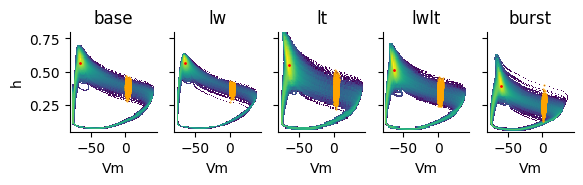

In [59]:
fig, axes = plt.subplots(1,5, figsize=(6.5, 6.5/5), sharex=True, sharey=True)

ax_ind = 0
for stim_type in stim_types:
    
    axes[ax_ind].hist2d(sims[stim_type]._v, sims[stim_type]._h, bins=80, cmin=1, norm=mpl.colors.LogNorm())
    # median history
    med_history = median_histories[stim_type]
    axes[ax_ind].scatter(med_history['v'], med_history['h'], c='red', s=1)
    # spiking history
    spike_histories = spiking_histories[stim_type]
    for i in range(spike_histories.shape[0]):
        axes[ax_ind].scatter(spike_histories.iloc[i]['v'], spike_histories.iloc[i]['h'], c='orange', alpha=1, s=.2)
    
    axes[ax_ind].set_title(stim_type)
    axes[ax_ind].set_xlabel('Vm')
    
    axes[ax_ind].spines['top'].set_visible(False)
    axes[ax_ind].spines['right'].set_visible(False)
    ax_ind += 1
    
axes[0].set_ylabel('h')
axes[1].set_ylim(.05,.8)
axes[1].set_xlim(-80, 45)

plt.savefig(f'{figures_dir}point_cell_manifolds.svg', format='svg')
plt.show()

In [14]:
# this is what is communicated to ./scripts/nInputs.py
median_histories

{'base': {'v': -65.45757049132006,
  'm': 0.05041380259022316,
  'n': 0.33128517586891293,
  'h': 0.5676423830370596},
 'low weight': {'v': -64.98313650250032,
  'm': 0.05383577038687873,
  'n': 0.3297914730396643,
  'h': 0.5687591356038831},
 'long tau': {'v': -65.30945929783302,
  'm': 0.05156593785053886,
  'n': 0.3368912587276196,
  'h': 0.5510504555288169},
 'half weight\nlong tau': None,
 'burst': {'v': -60.387606529120816,
  'm': 0.09214659726254952,
  'n': 0.4130117715279151,
  'h': 0.39444536571531863},
 'low weight\nlong tau': {'v': -64.15174206533288,
  'm': 0.05825828134859517,
  'n': 0.3549270857717557,
  'h': 0.5140650406659077}}

In [15]:
# find median spiking histories
def get_median_history_from_vecs(df):
    _v = standarize_column(np.array(df['v']))
    _m = standarize_column(np.array(df['m']))
    _n = standarize_column(np.array(df['n']))
    _h = standarize_column(np.array(df['h']))

    # calculate the median of each state variable
    median_values = {
        'v': np.median(_v),
        'm': np.median(_m),
        'n': np.median(_n),
        'h': np.median(_h)
    }
    
    dists = []
    for i in range(len(_v)):
        dists.append(dist({'v':_v[i],'m':_m[i],'n':_n[i],'h':_h[i]}, median_values))

    return {
            'v': df['v'].iloc[np.argmin(dists)],
            'm': df['m'].iloc[np.argmin(dists)],
            'n': df['n'].iloc[np.argmin(dists)],
            'h': df['h'].iloc[np.argmin(dists)]
    }

In [16]:
median_spiking_histories = {
    'base':get_median_history_from_vecs(spiking_histories['base']),
    'long tau':get_median_history_from_vecs(spiking_histories['long tau']),
    'low weight':get_median_history_from_vecs(spiking_histories['low weight']),
    'burst':get_median_history_from_vecs(spiking_histories['burst']),
    'low weight\nlong tau':get_median_history_from_vecs(spiking_histories['low weight\nlong tau'])
}

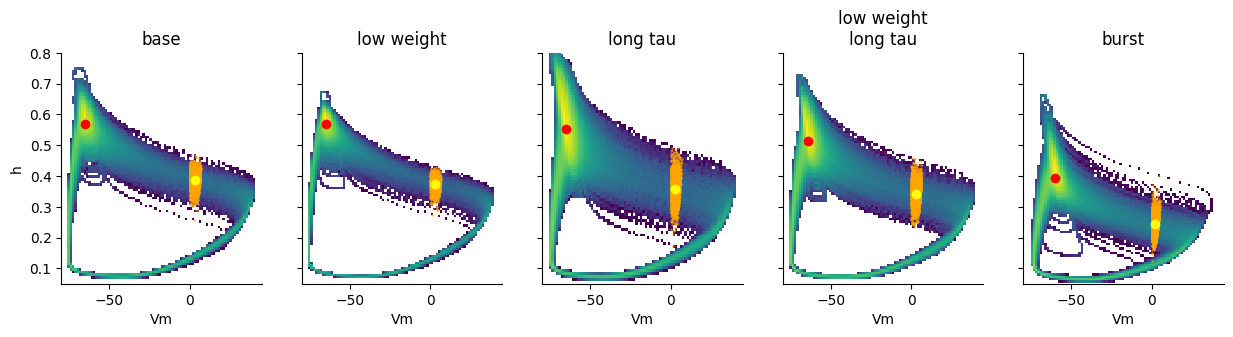

In [17]:
fig, axes = plt.subplots(1,5, figsize=(15, 3), sharex=True, sharey=True)

ax_ind = 0
for sim, sim_name in zip(sims, sim_names):
    
    axes[ax_ind].hist2d(sim._v, sim._h, bins=80, cmin=1, norm=mpl.colors.LogNorm())
    # median history
    med_history = median_histories[sim_name]
    axes[ax_ind].scatter(med_history['v'], med_history['h'], c='red')
    # spiking history
    spike_histories = spiking_histories[sim_name]
    for i in range(spike_histories.shape[0]):
        axes[ax_ind].scatter(spike_histories.iloc[i]['v'], spike_histories.iloc[i]['h'], c='orange', alpha=1, s=.2)
    
    axes[ax_ind].set_title(sim_name)
    axes[ax_ind].set_xlabel('Vm')
    
    axes[ax_ind].spines['top'].set_visible(False)
    axes[ax_ind].spines['right'].set_visible(False)
    
    # median spiking histories
    axes[ax_ind].scatter(
        median_spiking_histories[sim_name]['v'], 
        median_spiking_histories[sim_name]['h'], c='yellow')
    
    ax_ind += 1

axes[0].set_ylabel('h')
axes[1].set_ylim(.05,.8)
axes[1].set_xlim(-80, 45)
plt.show()

In [18]:
median_spiking_histories

{'base': {'v': 3.1467972874861854,
  'm': 0.5963301026900094,
  'n': 0.43650593858946773,
  'h': 0.387981370031296},
 'long tau': {'v': 3.0269164820671532,
  'm': 0.6162983737788585,
  'n': 0.4502745276232706,
  'h': 0.35692976389204845},
 'low weight': {'v': 3.0474899498415775,
  'm': 0.601971521242812,
  'n': 0.44262829174638796,
  'h': 0.37241647527494703},
 'burst': {'v': 1.9863708771205149,
  'm': 0.6798234186596969,
  'n': 0.5165930634510643,
  'h': 0.24419770039479313},
 'low weight\nlong tau': {'v': 2.8477559421550227,
  'm': 0.6161485920054092,
  'n': 0.45792794276246257,
  'h': 0.3426860210219315}}